In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'russia_losses_equipment.csv'
data = pd.read_csv(file_path)

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       1011 non-null   datetime64[ns]
 1   day                        1011 non-null   int64         
 2   aircraft                   1011 non-null   int64         
 3   helicopter                 1011 non-null   int64         
 4   tank                       1011 non-null   int64         
 5   APC                        1011 non-null   int64         
 6   field artillery            1011 non-null   int64         
 7   MRL                        1011 non-null   int64         
 8   military auto              65 non-null     float64       
 9   fuel tank                  65 non-null     float64       
 10  drone                      1011 non-null   int64         
 11  naval ship                 1011 non-null   int64   

In [ ]:
print("\nFirst Few Rows:")
print(data.head())



First Few Rows:
        date   day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0 2024-12-01  1012       369         329  9469  19369            20923  1253   
1 2024-11-30  1011       369         329  9463  19355            20909  1253   
2 2024-11-29  1010       369         329  9458  19339            20886  1255   
3 2024-11-28  1009       369         329  9450  19306            20852  1255   
4 2024-11-27  1008       369         329  9449  19304            20830  1255   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            NaN        NaN  19803          28                   1019   
1            NaN        NaN  19792          28                   1019   
2            NaN        NaN  19750          28                   1006   
3            NaN        NaN  19661          28                   1005   
4            NaN        NaN  19616          28                   1005   

   special equipment  mobile SRBM system greatest losses direct

In [ ]:
columns_to_analyze = [
    "aircraft", "helicopter", "tank", "APC", "field artillery",
    "MRL", "military auto", "fuel tank", "drone", "naval ship",
    "anti-aircraft warfare", "special equipment", "mobile SRBM system"
]



In [ ]:



print("\nSummary Statistics:")
print(data[columns_to_analyze].describe())




Summary Statistics:
          aircraft   helicopter         tank           APC  field artillery  \
count  1011.000000  1011.000000  1011.000000   1011.000000      1011.000000   
mean    296.350148   277.263106  4654.639960   9150.032641      6738.871414   
std      67.260879    65.595566  2590.633943   4893.517787      6127.862818   
min      10.000000     7.000000    80.000000    516.000000        49.000000   
25%     277.000000   259.000000  2754.000000   5590.500000      1774.000000   
50%     315.000000   310.000000  4102.000000   8019.000000      4463.000000   
75%     347.000000   325.000000  6864.000000  13144.000000     10833.000000   
max     369.000000   329.000000  9469.000000  19369.000000     20923.000000   

               MRL  military auto  fuel tank         drone   naval ship  \
count  1011.000000      65.000000  65.000000   1011.000000  1011.000000   
mean    683.093966    1047.507692  69.323077   5524.248269    19.595450   
std     360.746822     466.162060   7.5459

In [ ]:

# 1. Daily Loss Analysis
daily_avg_losses = data[columns_to_analyze].mean()
print("\nAverage Daily Losses:")
print(daily_avg_losses)



Average Daily Losses:
aircraft                  296.350148
helicopter                277.263106
tank                     4654.639960
APC                      9150.032641
field artillery          6738.871414
MRL                       683.093966
military auto            1047.507692
fuel tank                  69.323077
drone                    5524.248269
naval ship                 19.595450
anti-aircraft warfare     463.495549
special equipment        1075.457661
mobile SRBM system          3.944444
dtype: float64


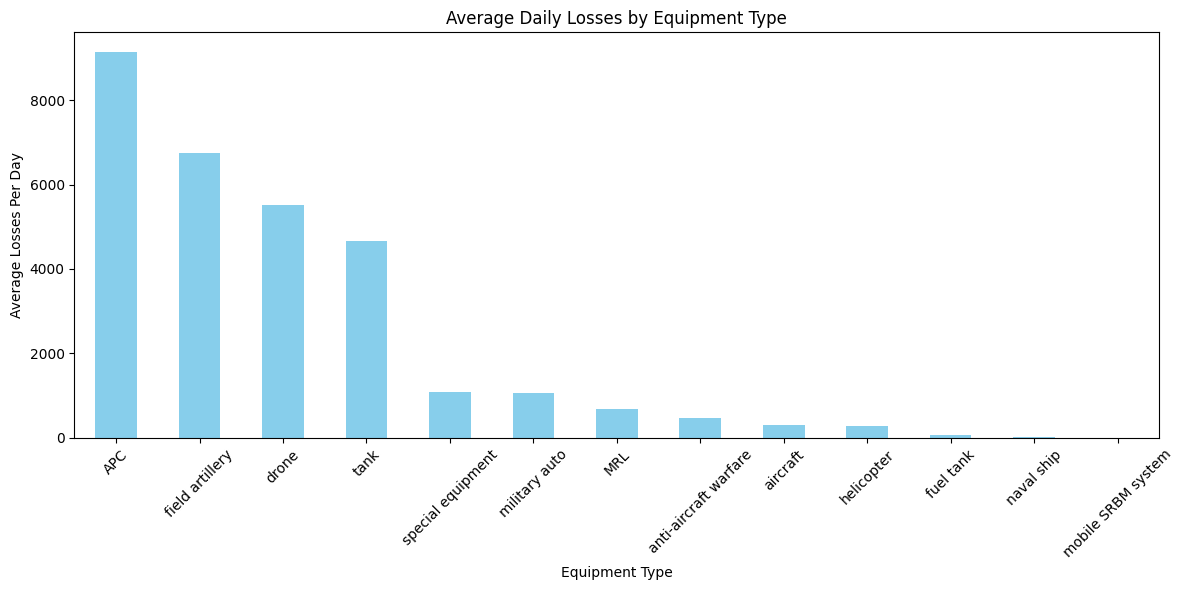

In [ ]:
# Visualize daily average losses
plt.figure(figsize=(12, 6))
daily_avg_losses.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Daily Losses by Equipment Type')
plt.xlabel('Equipment Type')
plt.ylabel('Average Losses Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# 2. Cumulative Loss Analysis
cumulative_losses = data[columns_to_analyze].cumsum()
cumulative_losses.set_index(data['date'], inplace=True)

<Figure size 1400x800 with 0 Axes>

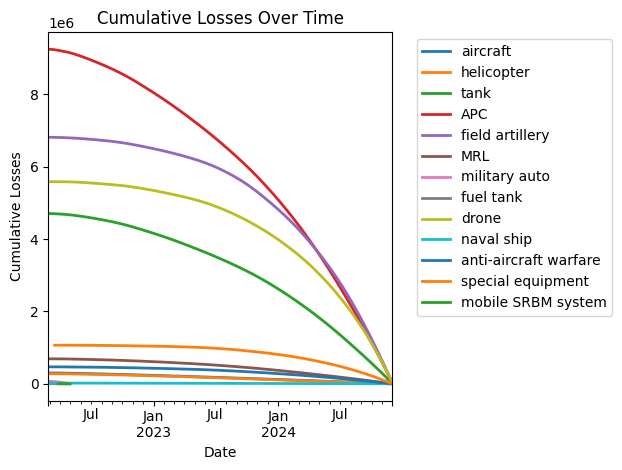

In [ ]:
# Plot cumulative losses
plt.figure(figsize=(14, 8))
cumulative_losses.plot(linewidth=2)
plt.title('Cumulative Losses Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Losses')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Loss Proportions
total_losses = data[columns_to_analyze].sum()
loss_proportions = (total_losses / total_losses.sum()) * 100
print("\nLoss Proportions (%):")
print(loss_proportions)


Loss Proportions (%):
aircraft                  1.024200
helicopter                0.958235
tank                     16.086660
APC                      31.622954
field artillery          23.289865
MRL                       2.360806
military auto             0.232755
fuel tank                 0.015404
drone                    19.092068
naval ship                0.067723
anti-aircraft warfare     1.601863
special equipment         3.646982
mobile SRBM system        0.000485
dtype: float64


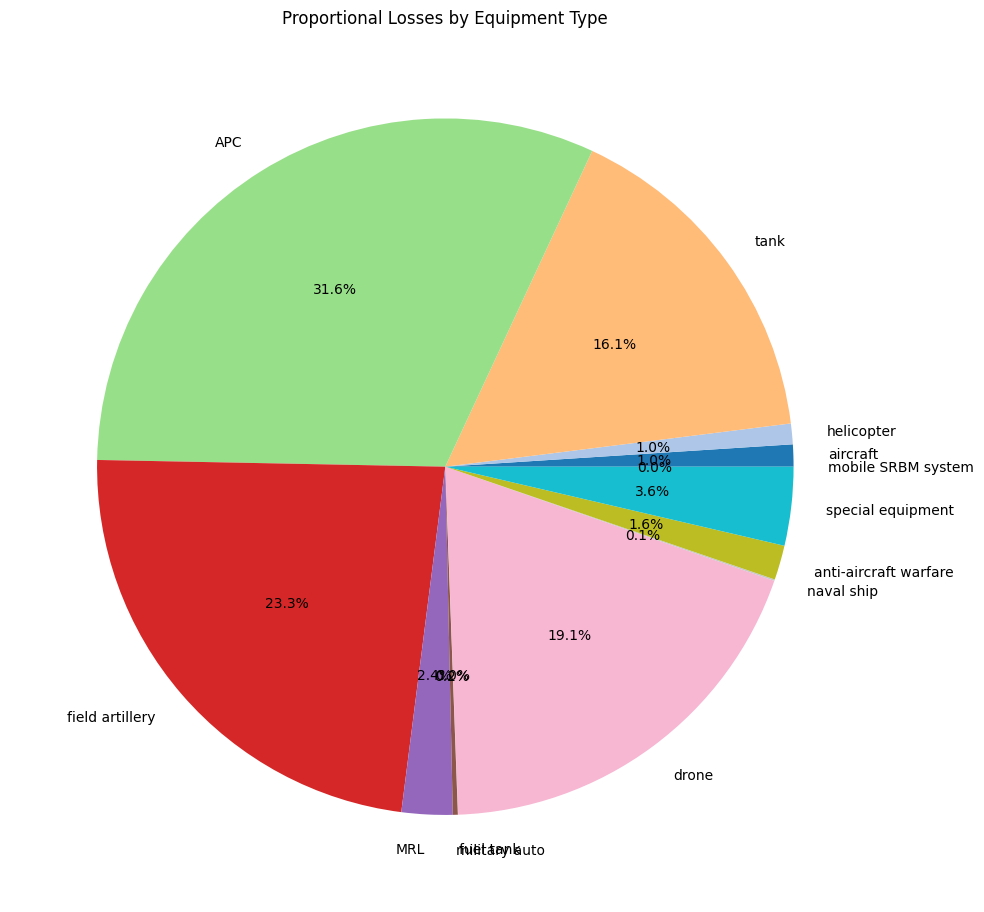

In [ ]:
plt.figure(figsize=(10,20))
loss_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=360, colormap='tab20')
plt.title('Proportional Losses by Equipment Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Greatest Losses Direction
direction_counts = data['greatest losses direction'].value_counts()
print("\nGreatest Losses Direction Counts:")
print(direction_counts)


Greatest Losses Direction Counts:
greatest losses direction
Donetsk                                28
Bakhmut                                25
Kramatorsk and Donetsk                  9
Kramatorsk                              8
Bakhmut and Lyman                       6
                                       ..
Donetsk, Bakhmut and Kramatorsk         1
Kramatorsk, Avdiivka and Kryvyi Rih     1
Kramatorsk, Kryvyi Rih and Bakhmut      1
Kryvyi Rih and Mykolaiv                 1
Kurakhove and Izyum                     1
Name: count, Length: 64, dtype: int64


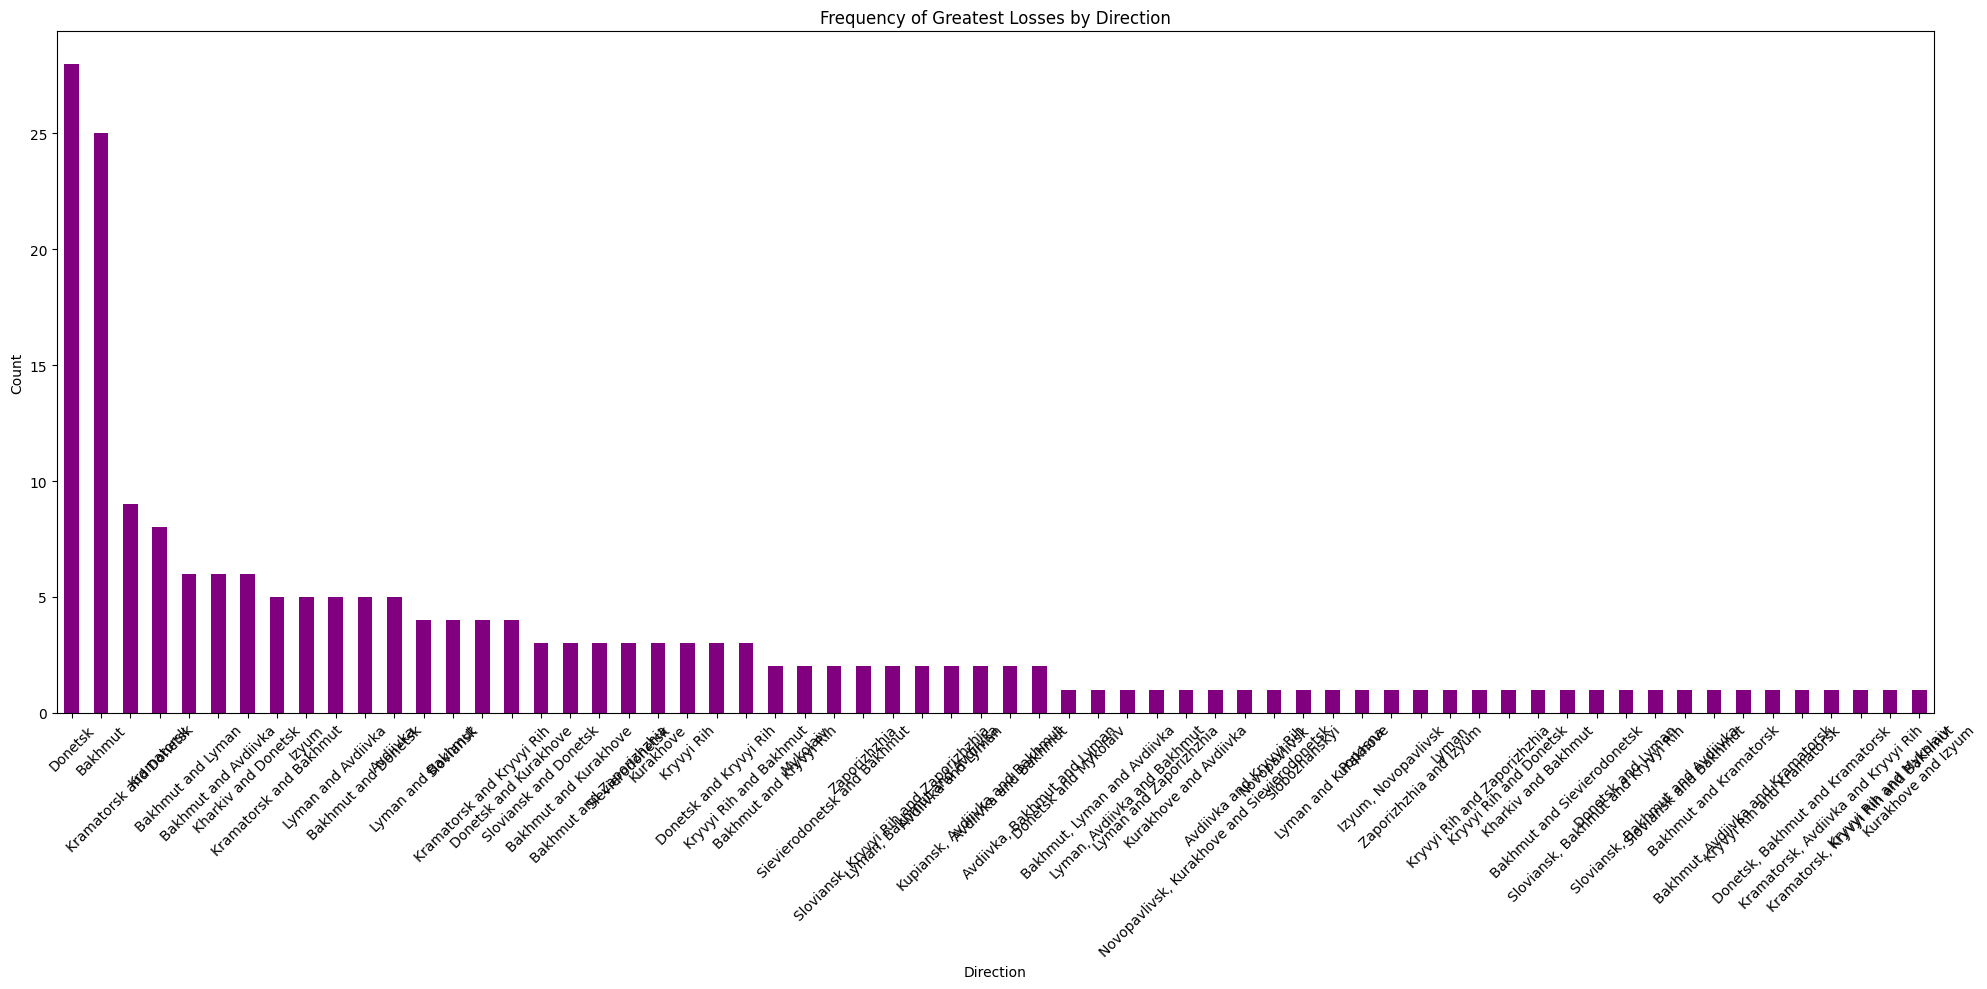

In [ ]:
# Visualize greatest losses direction
plt.figure(figsize=(20,10))
direction_counts.plot(kind='bar', color='purple')
plt.title('Frequency of Greatest Losses by Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

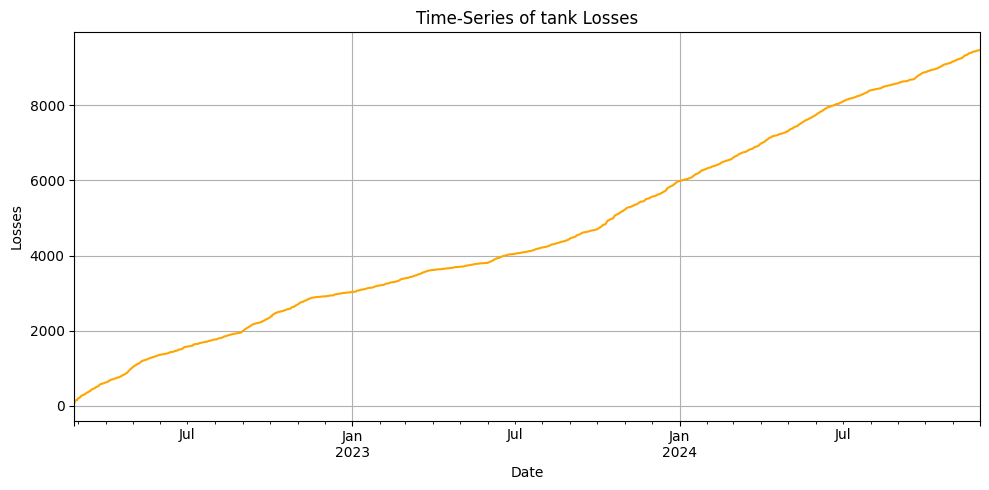

In [ ]:
# 5. Time-Series Analysis for Specific Equipment
# (e.g., "tank")
equipment_to_plot = 'tank'
plt.figure(figsize=(10, 5))
data.set_index('date')[equipment_to_plot].plot(color='orange')
plt.title(f'Time-Series of {equipment_to_plot} Losses')
plt.xlabel('Date')
plt.ylabel('Losses')
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# 6. Correlation Analysis
correlation_matrix = data[columns_to_analyze].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)




Correlation Matrix:
                       aircraft  helicopter      tank       APC  \
aircraft               1.000000    0.974348  0.874475  0.859888   
helicopter             0.974348    1.000000  0.827044  0.802381   
tank                   0.874475    0.827044  1.000000  0.997874   
APC                    0.859888    0.802381  0.997874  1.000000   
field artillery        0.755630    0.683577  0.970753  0.981033   
MRL                    0.888102    0.864905  0.989415  0.980481   
military auto          0.993953    0.962985  0.988725  0.993803   
fuel tank              0.921081    0.841115  0.887154  0.886196   
drone                  0.742192    0.664814  0.957605  0.972282   
naval ship             0.938743    0.878838  0.962805  0.956506   
anti-aircraft warfare  0.836646    0.795834  0.992413  0.990106   
special equipment      0.775713    0.668328  0.960509  0.974359   
mobile SRBM system     0.347026    0.258891  0.247350  0.263685   

                       field artillery  

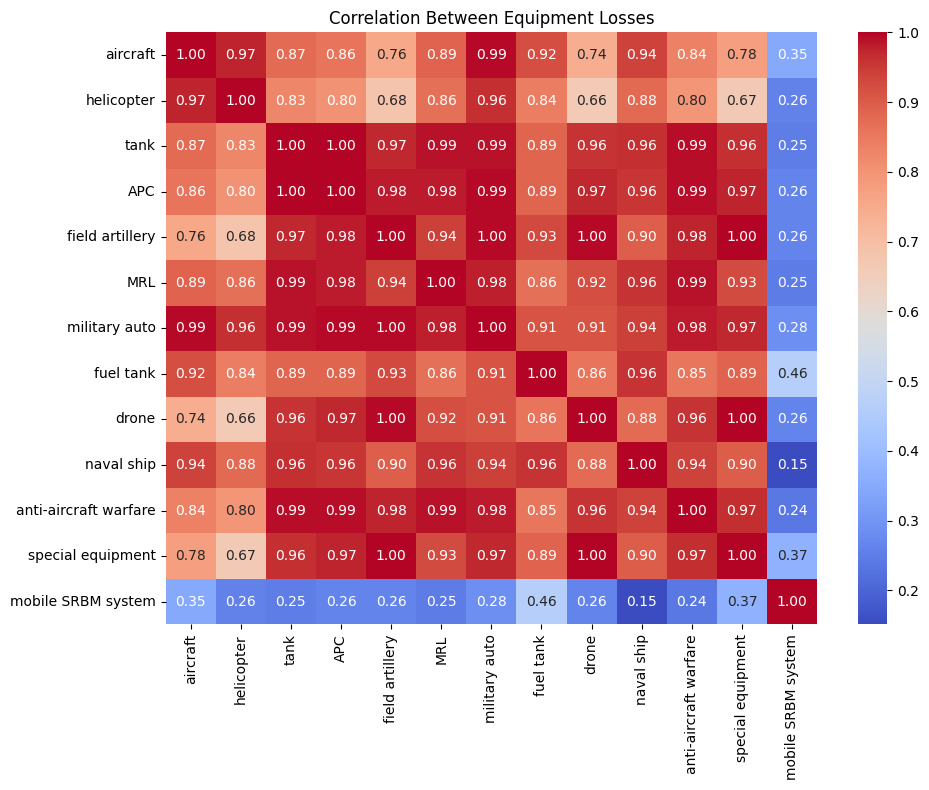

In [ ]:


# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Equipment Losses')
plt.tight_layout()
plt.show()

In [ ]:
#8. Vehicles and Fuel Tanks Combined Analysis

data['vehicles_and_fuel_tanks'] = data['military auto'] + data['fuel tank']
cumulative_combined = data[['date', 'vehicles_and_fuel_tanks']].set_index('date').cumsum()



<Figure size 1000x500 with 0 Axes>

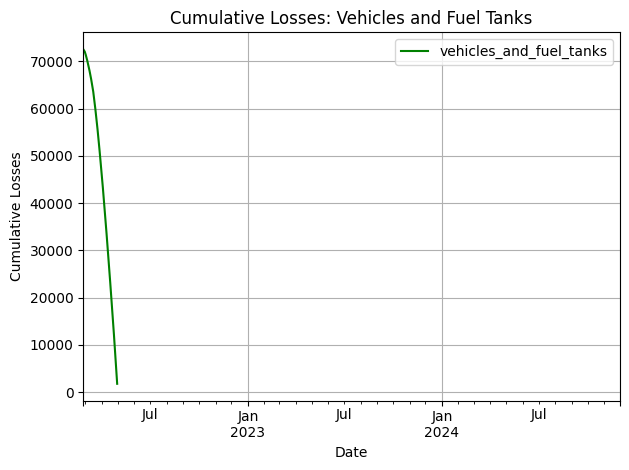

In [ ]:
plt.figure(figsize=(10, 5))
cumulative_combined.plot(color='green')
plt.title('Cumulative Losses: Vehicles and Fuel Tanks')
plt.xlabel('Date')
plt.ylabel('Cumulative Losses')
plt.grid()
plt.tight_layout()
plt.show()

